## From Record Monthly Surplus to the Largest Annual Deficit in 6 Years
On May 25, 2018, Judy Woodruff interviewed Marc Short, White House Director Of Legislative Affairs, on the PBS Newshour.  The video and transcript can be found at [this link](https://www.pbs.org/newshour/show/white-house-separation-of-migrant-families-at-border-is-product-of-bad-laws).  At 2:43 in the video, Marc Short states the following:

> And, lastly, in April, we had the largest surplus on record in American history. That is a result of the growth and the revenues coming into the federal government because of the tax plan.

A [Washington Times article](https://www.washingtontimes.com/news/2018/may/7/cbo-says-april-was-best-month-history-us-budget/) similarly reported the record surplus.  It starts:

> The federal government took in a record tax haul in April en route to its biggest-ever monthly budget surplus, the Congressional Budget Office said, as a surging economy left Americans with more money in their paychecks — and this more to pay to Uncle Sam.

> All told the government collected \$515 billion and spent \$297 billion, for a total monthly surplus of \$218 billion. That swamped the previous monthly record of \$190 billion, set in 2001.

However, the article went on to give more perspective than Marc Short, stating: 

> April is always a strong month for government finances, with taxpayers filing their returns for the previous year and settling up what they owe, even as expenditures often dip for the month.

> But this year was particularly strong, with receipts jumping 13 percent compared to a year ago.

Following is Python code which reads the Monthly Treasury Statements for the [current issue](https://www.fiscal.treasury.gov/reports-statements/mts/current.html) and [previous issues](https://www.fiscal.treasury.gov/reports-statements/mts/previous.html) and plots the monthly receipts, oulays, and surplus/deficit starting in October of 2014.


U.S. TREASURY RECEIPTS, OUTLAYS, AND DEFICITS: Monthly Amount ($billions)
            Total Receipts  Total Outlays  Surplus/Deficit
2014-10-01         212.719        334.432         -121.713
2014-11-01         191.436        248.254          -56.818
2014-12-01         335.327        333.463            1.864
2015-01-01         306.742        324.289          -17.546
2015-02-01         139.388        331.738         -192.350
2015-03-01         234.187        287.105          -52.918
2015-04-01         471.801        315.092          156.709
2015-05-01         212.386        296.454          -84.068
2015-06-01         342.933        292.447           50.487
2015-07-01         225.493        374.680         -149.187
2015-08-01         210.837        275.257          -64.420
2015-09-01         365.473        274.412           91.061
2015-10-01         211.046        347.604         -136.558
2015-11-01         204.968        269.517          -64.549
2015-12-01         349.631        364.075

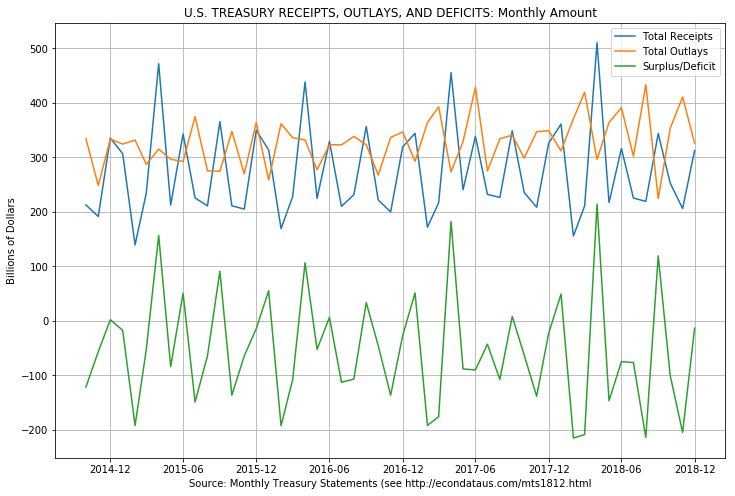

In [76]:
# Monthly Treasury Statement (MTS) - Current Issue:
# https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/current.htm (before 11/30/2018)
# https://www.fiscal.treasury.gov/reports-statements/mts/current.html (new)
# Monthly Treasury Statement (MTS) - Previous Issues:
# https://www.fiscal.treasury.gov/fsreports/rpt/mthTreasStmt/backissues.htm (before 11/30/2018)
# https://www.fiscal.treasury.gov/reports-statements/mts/previous.html (new)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
pd.set_option('display.width', 120)
#pd.set_option('max_rows', 200)

# START OF VARIABLES TO UPDATE
month_index_last = 3
year_last = 2019
yrmo_last = '1812'
moyr_last = '1218'
# (Note: manually update Jupyter URL and last month in final note below)
# END OF VARIABLES TO UPDATE
savefig_rec    = "mts" + yrmo_last + "rec12m.png"
savefig_recoth = "mts" + yrmo_last + "recoth12m.png"
savefig_def    = "mts" + yrmo_last + "def12m.png"
xlabel_last = "Source: Monthly Treasury Statements (see http://econdataus.com/mts" + yrmo_last + ".html"
# For 1018, had to change extention from .xls to .xlsx
xlsx_files_last = "https://www.fiscal.treasury.gov/files/reports-statements/mts/mts" + moyr_last + ".xlsx"

xlsx_files_yr = [
    'https://www.fiscal.treasury.gov/files/reports-statements/mts/mts0915.xls',
    'https://www.fiscal.treasury.gov/files/reports-statements/mts/mts0916.xls',
    'https://www.fiscal.treasury.gov/files/reports-statements/mts/mts0917.xls',
    'https://www.fiscal.treasury.gov/files/reports-statements/mts/mts0918.xls',
    xlsx_files_last
]
def joinyear(year):
    iyr = year - 2015
    #print("BEFORE "+xlsx_files_yr[iyr])
    xx = pd.read_excel(xlsx_files_yr[iyr], sheet_name='Table 7', index_col=0, skiprows=4)
    #print(" AFTER "+xlsx_files_yr[iyr])
    if year < 2019: # fix required for mts1118.xls
        xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,99,102], 0:12]
    else:
        xx = xx.iloc[[0,1,3,4,5,6,7,8,9,10,97,100], 0:12]
    years = [year-1,year-1,year-1,year,year,year,year,year,year,year,year,year]
    months = ['10','11','12','01','02','03','04','05','06','07','08','09']
    #months = [10,11,12,1,2,3,4,5,6,7,8,9]
    for i in range(0,12):
        years[i] = str(years[i])+"-"+months[i]+"-01"
    xx.columns = pd.to_datetime(years)
    xx.index = ['Individual','Corporation','Employment','Unemployment','Other Retirement',
                'Excise','Estate','Customs','Miscellaneous','Total Receipts','Total Outlays','Surplus/Deficit']
    if year >= year_last:
        xx = xx.iloc[:, 0:month_index_last]
    #print(xx)
    return(xx)

def joinyears(start_year, end_year):
    yy = joinyear(2015)
    for year in range(start_year+1, end_year+1):
        yy = yy.join(joinyear(year))
    return(yy.T)

def dofilter(ff, numeric=True, rollingsum=False, normalize=False, divisor=1000):
    #print(yy)
    #print(yy.T)
    first = 0
    for i in range(0,len(ff.columns)):
        #print(ff.iloc[:,i]) #DEBUG
        if (numeric):
            ff.iloc[:,i] = ff.iloc[:,i].str.replace(',','').astype(int)
        if (rollingsum):
            ff.iloc[:,i] = ff.iloc[:,i].rolling(window=12).sum()
            first = 11
        if (normalize):
            ff.iloc[:,i] = ff.iloc[:,i] - ff.iloc[first,i]
        ff.iloc[:,i] = ff.iloc[:,i]/divisor
    #yy = yy.T
    #yy = yy.iloc[:,9:]
    return(ff)

yy0 = joinyears(2015, year_last) # year_last gives error

yy = yy0.copy()
zz = dofilter(yy)
defs = zz.iloc[:,9:]
print('U.S. TREASURY RECEIPTS, OUTLAYS, AND DEFICITS: Monthly Amount ($billions)')
print(defs)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(defs)
ax.set_title('U.S. TREASURY RECEIPTS, OUTLAYS, AND DEFICITS: Monthly Amount')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(defs.columns)


The reason for starting in October of 2014 is that this date is the start of fiscal year 2015, the first year for which the Treasury has spreadsheets posted on its site.  In any event, the above plot clearly shows that receipts and surpluses peak in April of every year, presumedly due to taxpayers filing their returns.  The plot also shows that the prior two months appeared to have had the largest monthly deficits since at least October of 2014.  In fact, a [ZeroHedge article](https://www.zerohedge.com/news/2018-05-10/us-posts-biggest-budget-surplus-history) mentions that the "March budget deficit of \$208.7 billion was 18% higher than \$176.2BN deficit recorded last March, and was the biggest March budget deficit in US history."

In order to factor in the periodic surpluses and deficits that occur over each year, it makes sense to look at the 12-month rolling sum of these values.  That is done in the following Python code and the resulting plot.


U.S. TREASURY RECEIPTS, OUTLAYS, AND DEFICITS: Change in 12-Month Rolling Sum ($billions)
            Total Receipts  Total Outlays  Surplus/Deficit
2015-09-01           0.000          0.000            0.000
2015-10-01          -1.673         13.172          -14.845
2015-11-01          11.859         34.435          -22.576
2015-12-01          26.163         65.047          -38.884
2016-01-01          33.000         -0.826           33.825
2016-02-01          62.759         29.193           33.565
2016-03-01          56.420         77.979          -21.560
2016-04-01          23.051         94.864          -71.814
2016-05-01          35.269         75.521          -40.253
2016-06-01          21.908        106.394          -84.488
2016-07-01           6.413         54.531          -48.120
2016-08-01          26.903        117.712          -90.812
2016-09-01          17.967        166.478         -148.514
2016-10-01          28.613         86.397          -57.787
2016-11-01          23.52

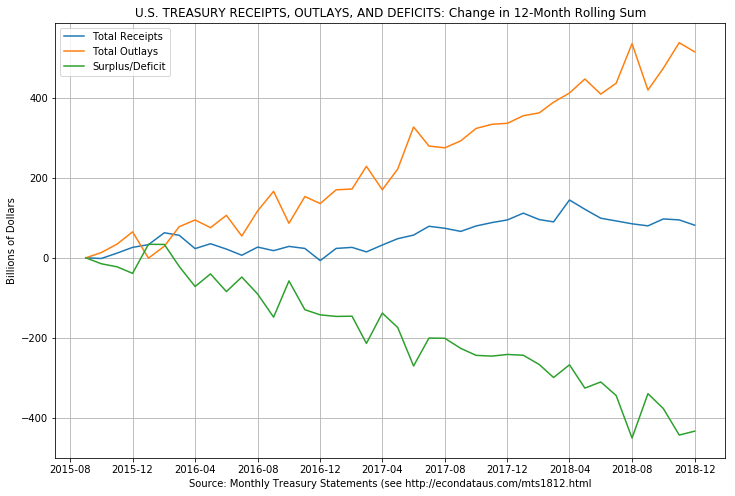

In [77]:
yy = yy0.copy()
zz = dofilter(yy, rollingsum=True, normalize=True)
dd = zz.iloc[:,9:]
print('U.S. TREASURY RECEIPTS, OUTLAYS, AND DEFICITS: Change in 12-Month Rolling Sum ($billions)')
print(dd.iloc[11:,:])
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('U.S. TREASURY RECEIPTS, OUTLAYS, AND DEFICITS: Change in 12-Month Rolling Sum')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(dd.columns)


As can be seen, the 12-month rolling sum of receipts has increased by about \$54 billion since Trump took office.  However, yearly outlays have increased by about \$248 billion, causing the yearly deficit to increase by about \$194 billion.

Focusing on the receipts, the following Python code plots the 12-month rolling sum of the three largest contributors to receipts.  Those are individual income taxes, corporation income taxes, and employment taxes.  Employment taxes consist chiefly of payroll taxes.


SOURCES OF U.S. TREASURY RECEIPTS: Change in 12-Month Rolling Sum ($billions)
            Individual  Corporation  Employment   Other
2015-09-01       0.000        0.000       0.000   0.000
2015-10-01       2.559       -5.972       3.988  -2.246
2015-11-01      10.216       -4.881       8.562  -2.036
2015-12-01      13.914      -12.141      11.811  12.582
2016-01-01      17.945      -12.406      16.014  11.449
2016-02-01      42.063      -12.997      17.654  16.039
2016-03-01      33.234      -10.207      14.795  18.598
2016-04-01      11.202      -17.770      17.591  12.029
2016-05-01      23.123      -20.568      21.486  11.227
2016-06-01       4.124      -32.064      36.512  13.334
2016-07-01      -5.139      -34.125      41.966   3.709
2016-08-01       7.193      -35.307      46.639   8.376
2016-09-01       5.274      -44.226      51.856   5.061
2016-10-01      17.630      -46.205      53.786   3.400
2016-11-01      15.739      -49.235      55.199   1.816
2016-12-01       6.549    

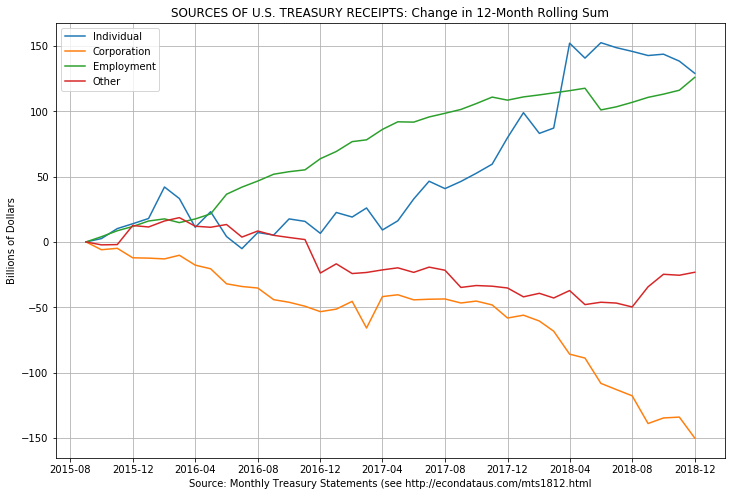

In [78]:
yy = yy0.copy()
zz = dofilter(yy, rollingsum=True, normalize=True)
dd = zz.iloc[:,0:3]
oo = zz.iloc[:,3:9]
dd.is_copy = False # avoids warning
dd['Other'] = oo.sum(axis=1, skipna=False)
print('SOURCES OF U.S. TREASURY RECEIPTS: Change in 12-Month Rolling Sum ($billions)')
print(dd.iloc[11:,:])
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('SOURCES OF U.S. TREASURY RECEIPTS: Change in 12-Month Rolling Sum')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(dd.columns)
fig.savefig(savefig_rec)


As can be seen, yearly individual income tax receipts have risen about \$124 billion under Trump.  Yearly employment tax receipts have risen about \$34 billion and yearly corporation tax receipts have dropped about \$94 billion.  It is interesting to note that most of the drop in corporation tax receipts have occurred since the passage of the Tax Cuts and Jobs Act of 2017 so that may be the most visible effect of the tax bill on receipts.  The surge in individual tax receipts likely has little to do with the tax bill since the taxes paid in April are based on the prior tax law.  Regarding individual tax receipts, the Washington Times article does say the following:

> Analysts said they’ll have a better idea of what’s behind the surge as more information rolls in, but for now said it looks like individual taxpayers are paying more because they have higher incomes.

> “Those payments were mostly related to economic activity in 2017 and may reflect stronger-than-expected income growth in that year,” the analysts said in their monthly budget review. “Part of the strength in receipts also may reflect larger-than-anticipated payments for economic activity in 2018. The reasons for the added revenues will be better understood as more detailed information becomes available later this year.”

In any event, the following Python code shows the 12-month rolling sum of the other contributors to receipts.

OTHER SOURCES OF U.S. TREASURY RECEIPTS: Change in 12-Month Rolling Sum ($billions)
            Unemployment  Other Retirement  Excise  Estate  Customs  Miscellaneous
2015-09-01         0.000             0.000   0.000   0.000    0.000          0.000
2015-10-01        -1.031             0.018  -0.338   0.714   -0.050         -1.559
2015-11-01         0.585             0.036  -0.040   0.919   -0.127         -3.409
2015-12-01         0.158             0.121   0.116   1.117   -0.027         11.097
2016-01-01        -0.147             0.081  -0.451   1.043   -0.003         10.926
2016-02-01        -0.709             0.129  -0.202   1.355    0.012         15.454
2016-03-01        -0.696             0.134  -0.161   1.314    0.258         17.749
2016-04-01        -4.766             0.139  -0.346   1.217   -0.374         16.159
2016-05-01        -2.184             0.157  -0.944   1.006   -0.495         13.687
2016-06-01        -2.314             0.174  -1.134   1.430   -0.655         15.833
201

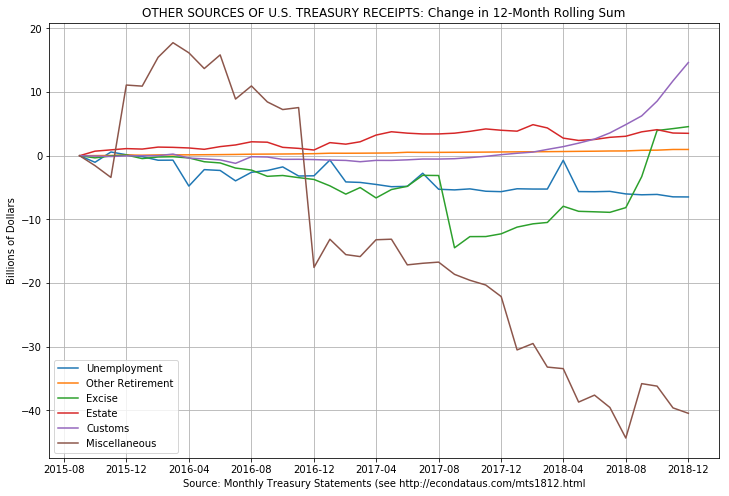

In [79]:
yy = yy0.copy()
zz = dofilter(yy, rollingsum=True, normalize=True)
dd = zz.iloc[:,3:9]
print('OTHER SOURCES OF U.S. TREASURY RECEIPTS: Change in 12-Month Rolling Sum ($billions)')
print(dd.iloc[11:,:])
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('OTHER SOURCES OF U.S. TREASURY RECEIPTS: Change in 12-Month Rolling Sum')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(dd.columns)
fig.savefig(savefig_recoth)


As can be seen, yearly receipts from excise taxes have risen about \$3 billion, customs taxes have risen about \$7 billion, and yearly miscellaneous receipts have fallen about \$20 billion since Trump took office.  Adding that to the \$124 billion gain in individual tax receipts, \$34 billion gain in employment tax receipts, and \$94 billion loss in corporation tax receipts gives a total gain of about \$54 billion for all receipts, same as was shown in the second plot above.

The [CBO Monthly Budget Review for April 2018](https://www.cbo.gov/publication/53821), referenced by the Washington Times article as mentioned above, starts as follows:

> The federal budget deficit was \$382 billion for the first seven months of fiscal year 2018, the Congressional Budget Office estimates, \$37 billion more than the shortfall recorded during the same period last year. Revenues and outlays were higher, by 4 percent and 5 percent, respectively, than they were during the first seven months of fiscal year 2017.

Hence, despite the increase in receipts, the deficit is continuing to grow.  The following Python code plots the increase the 12-month rolling sum of the deficit.


U.S. TREASURY SURPLUS/DEFICIT(-): 12-Month Rolling Sum ($billions)
            Surplus/Deficit
2015-09-01         -438.899
2015-10-01         -453.744
2015-11-01         -461.475
2015-12-01         -477.783
2016-01-01         -405.074
2016-02-01         -405.334
2016-03-01         -460.459
2016-04-01         -510.713
2016-05-01         -479.152
2016-06-01         -523.387
2016-07-01         -487.019
2016-08-01         -529.711
2016-09-01         -587.413
2016-10-01         -496.686
2016-11-01         -568.806
2016-12-01         -581.699
2017-01-01         -585.605
2017-02-01         -585.039
2017-03-01         -653.229
2017-04-01         -577.256
2017-05-01         -613.172
2017-06-01         -709.657
2017-07-01         -639.777
2017-08-01         -640.354
2017-09-01         -665.713
2017-10-01         -683.096
2017-11-01         -684.974
2017-12-01         -680.829
2018-01-01         -682.849
2018-02-01         -706.044
2018-03-01         -738.555
2018-04-01         -706.728
2018-05-0

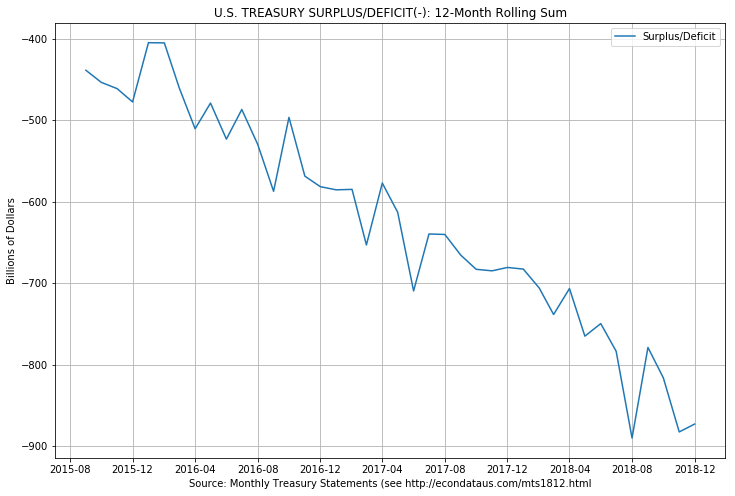

In [80]:
yy = yy0.copy()
zz = dofilter(yy, rollingsum=True)
dd = zz.iloc[:,[11]]
print('U.S. TREASURY SURPLUS/DEFICIT(-): 12-Month Rolling Sum ($billions)')
print(dd.iloc[11:,:])
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(dd)
ax.set_title('U.S. TREASURY SURPLUS/DEFICIT(-): 12-Month Rolling Sum')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(dd.columns)
fig.savefig(savefig_def)


As can be seen, the annual deficit has increased from just under \$600 billion per year when Trump took office to nearly \$800 billion per year now.  In fact, a [CNBC article](https://www.cnbc.com/2018/10/15/us-budget-deficit-expands-to-779-billion-in-fiscal-2018-as-spending-surges.html) describes it as follows:

> The deficit jumped to \$779 billion, \$113 billion or 17 percent higher than the previous fiscal period, according to a statement from Treasury Secretary Steven Mnuchin and Office of Management and Budget Director Mick Mulvaney. It was larger than any year since 2012, when it topped \$1 trillion. The budget shortfall rose to 3.9 percent of U.S. gross domestic product.

The [referenced statement from Steven Mnuchin and Mick Mulvaney](https://home.treasury.gov/news/press-releases/sm522) contains the following table:

| Budget in billions of $   |Receipts | Outlays | Deficit |
| ------------------------- | -------:| -------:| -------:|
|FY 2017 Actual             |   3,315 |   3,981 |    -666 |
|   Percentage of GDP       |   17.2% |   20.7% |    3.5% |
|FY 2018 Estimates:         |         |         |         |
|   2019 Budget             |   3,340 |   4,173 |    -833 |
|   2019 Mid-Session Review |   3,322 |   4,171 |    -849 |
|FY 2018 Actual             |   3,329 |   4,108 |    -779 |
|   Percentage of GDP       |   16.5% |   20.3% |    3.9% |

As can be seen, both receipts and outlays increased from the prior year though receipts just increased slightly.  However, the table shows that both receipts and outlays decreased as a percentage of GDP.  In fact, the statement itself states:

> As a percentage of GDP, receipts equaled 16.5 percent, 0.7 percentage point lower than in FY 2017 and 0.9 percentage point below the average over the last 40 years.

Also, the [Congressional Budget Office's Monthly Budget Review for September 2018](https://www.cbo.gov/system/files?file=2018-10/54551-MBR.pdf) states the following:

> The federal budget deficit was \$782 billion in fiscal year 2018, the Congressional Budget Office estimates, \$116 billion more than the shortfall recorded in fiscal year 2017. As was the case last year, this year’s outlays were affected by shifts in the timing of certain payments that otherwise would have been due on a weekend. If not for those shifts, the deficit for the year would have been \$826 billion—\$162 billion larger than last year’s amount. 

This shifting of payments was caused by the fact that October 1, 2017 was on a Sunday.  For this reason, certain payments scheduled for that day had to be shifted to Friday, September 29 of the prior fiscal year.  On the other hand, October 1, 2018 was on a Monday so no payments had to be shifted this year.  In fact, this is the reason that the 12-month rolling sum for the deficit decreased sharply from \$890 billion to \$779 billion.  For this month, September of 2017 (which had those additional shifted outlays) was dropped and September of 2018 (which had normal outlays) was added.  As seen in the second graph above, this caused a drop in annual outlays and deficits.  However, since outlays were shifted from FY2018 to FY2017 (but not from FY2019 to FY2018) this causes the FY2018 deficit to be lower by the amount of the shifted payments.

In any case, the record surplus in April does not appear to signify anything more than the fact that 2017 had relatively strong economic growth.  Contrary to Marc Short's statement, it doesn't appear to have much, if anything, to do with the tax bill that was passed at the end of 2016.  On the contrary, the fact that receipts are below their 40-year average, even in a good economy, suggests that the tax cuts have much to do with why the deficit is continuing to grow.

#### Looking at the Change in the Debt

On February 13, 2019, CNSNews.com released a story titled [\$1,665,484,000,000: Feds Collect Record Individual Income Taxes in Calendar 2018--as Debt Climbed \$1,481,349,159,596.80](https://www.cnsnews.com/news/article/terence-p-jeffrey/1665484000000-feds-collect-record-individual-income-taxes-calendar).  It states:

> At the same time the Treasury was collecting record individual income taxes, the federal debt was climbing from \$20,492,746,546,193.75 at the close of 2017 to \$21,974,095,705,790.55 at the close of 2018. That was a one-year increase of \$1,481,349,159,596.80.

In order to verify these numbers, the following code takes data from the Monthly Treasury Statements since September of 2014.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

def joinyear6(month, year):
    yr = year % 100
    smo = ['00','01','02','03','04','05','06','07','08','09','10','11','12']
    filetype = '.xls'
    if year <= 2015 and month <= 4:
        filetype = '.xlsx'
    if year == 2016 and month == 2:
        filetype = '.xlsx'
    if year == 2018 and month == 7:
        filetype = '.xlsx'
    if year == 2018 and month >= 10:
        filetype = '.xlsx'
    filepath = "https://www.fiscal.treasury.gov/files/reports-statements/mts/mts"+smo[month]+str(yr)+filetype
    print("BEFORE "+filepath)
    #if year < 2017 or (year == 2017 and month == 1):
    if year == 2018 and month == 11:
        xx = pd.read_excel(filepath, sheet_name='Table 6', index_col=0, skiprows=6)
    else:
        xx = pd.read_excel(filepath, sheet_name='Table 6', index_col=0, skiprows=5)
    
    #print(xx)
    #print(" AFTER "+filepath)
    xx = xx.iloc[4:7, 5]
    xx[0] = int(xx[0].replace(',',''))/1000
    xx[1] = int(xx[1].replace(',',''))/1000
    xx[2] = int(xx[2].replace(',',''))/1000
    xx.index = ['Public','Intragov','Gross']
    dd = pd.DataFrame(xx).T
    #print(dd)
    return(dd)

def joinyears6(start_month, start_year, end_month, end_year):
    month = start_month
    year = start_year
    yy = joinyear6(month, year)
    month = month + 1
    if month > 12:
        month = 1
        year = year + 1
    while year <= end_year or (year == end_year and month <= end_month):
        xx = joinyear6(month, year)
        yy = yy.append(xx)
        month = month + 1
        if month > 12:
            month = 1
            year = year + 1
    return(yy)

filename = 'mtsdebts_1409_1502.csv'
print("BEFORE "+filename)
zz = pd.read_csv(filename, index_col=0)


filename = 'mtsdebts_1503_1612.csv'
csvfile = Path(filename)
if csvfile.is_file():
    print("BEFORE "+filename)
    yy = pd.read_csv(filename, index_col=0)
else:
    yy = joinyears6(3, 2015, 12, 2016)
    yy.to_csv(filename)

zz = zz.append(yy)
filename = 'mtsdebts_1701_1703.csv'
print("BEFORE "+filename)
yy = pd.read_csv(filename, index_col=0)
zz = zz.append(yy)

filename = 'mtsdebts_1704_1812.csv'
csvfile = Path(filename)
if csvfile.is_file():
    print("BEFORE "+filename)
    yy = pd.read_csv(filename, index_col=0)
else:
    yy = joinyears6(4, 2017, 12, 2018)
    yy.to_csv(filename)

zz = zz.append(yy)
zz.index = pd.to_datetime(zz.index)
zz.to_csv('mtsdebts_1503_1812.csv')

#zz = pd.read_html(filepath) # for html format
#print(zz)
#print(zz.info())


BEFORE mtsdebts_1409_1502.csv
BEFORE mtsdebts_1503_1612.csv
BEFORE mtsdebts_1701_1703.csv
BEFORE mtsdebts_1704_1812.csv


The following table and graph of the Monthly Treasury Statement numbers show the increase in the national debt to the end of 2018.

U.S. DEBT HELD BY THE PUBLIC AND GROSS DEBT ($billions)
               Public      Gross
2014-09-01  12784.971  17824.071
2014-10-01  12857.056  17937.160
2014-11-01  12922.682  18005.549
2014-12-01  13023.951  18141.444
2015-01-01  12984.930  18082.293
2015-02-01  13074.036  18155.854
2015-03-01  13090.399  18152.056
2015-04-01  13053.681  18152.560
2015-05-01  13052.706  18152.852
2015-06-01  13076.413  18151.998
2015-07-01  13135.044  18151.323
2015-08-01  13119.752  18151.150
2015-09-01  13123.847  18150.618
2015-10-01  13060.656  18152.982
2015-11-01  13588.988  18827.323
2015-12-01  13672.521  18922.179
2016-01-01  13657.154  19012.828
2016-02-01  13785.188  19125.455
2016-03-01  13924.877  19264.939
2016-04-01  13841.194  19187.387
2016-05-01  13886.302  19265.452
2016-06-01  13932.742  19381.591
2016-07-01  13998.219  19427.695
2016-08-01  14104.113  19510.296
2016-09-01  14173.423  19573.445
2016-10-01  14286.500  19805.715
2016-11-01  14443.699  19948.065
2016-12-01  14434.84

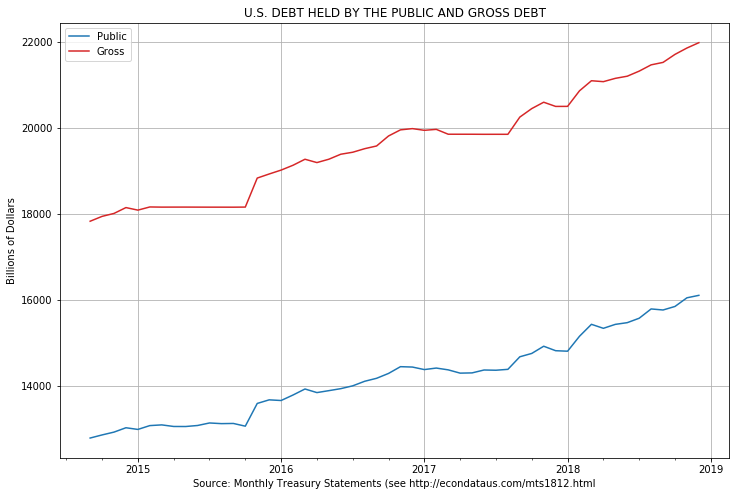

In [82]:
print('U.S. DEBT HELD BY THE PUBLIC AND GROSS DEBT ($billions)')
zz0 = zz
zz0 = zz0.drop('Intragov', 1)
print(zz0)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
colors = ['C0','C3']
#ax.plot(zz0)
zz0[:].plot(ax = ax, color=colors)
ax.set_title('U.S. DEBT HELD BY THE PUBLIC AND GROSS DEBT')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(zz0.columns)
savefig_debts = "mts" + yrmo_last + "debts.png"
fig.savefig(savefig_debts)


As can be seen above, the gross federal debt rose to nearly \$22 trillion at the end of 2018.  This is the "federal debt" referenced in the CNSNews.com article.  Also shown is the Debt Held by the Public which rose to over \$16 trillion.  The difference between these to measures of the debt is the Intragovernmental Holdings.  This is described on [Wikipedia](https://en.wikipedia.org/wiki/Intragovernmental_holdings) as follows:

> In the United States, intragovernmental holdings are primarily composed of the Medicare Trust Fund, the Social Security Trust Fund, and Federal Financing Bank securities. A small amount of marketable securities are held by government accounts.

An interesting thing apparent in the graph is how the debt totals went flat for most of 2015 and 2017.  This was caused by the debt ceiling, explained by [this article](https://www.thebalance.com/u-s-debt-ceiling-why-it-matters-past-crises-3305868) as follows:

> On March 15, 2015, the nation reached the debt ceiling of \$18.113 trillion. In response, the Treasury Secretary stopped issuing new debt. He took extraordinary measures to keep the debt from exceeding the limit. For example, he stopped payments to federal employee retirement funds. He also sold investments held by those funds. He kept the debt under the limit until Congress passed the Bipartisan Budget Act of 2015 on November 15. The ceiling remained suspended until March 15, 2017. That means the Treasury Department could not allow the statutory debt limit to go one penny higher than the \$19.808 trillion it was on that day.

> Treasury kept the debt under that ceiling until September 8, 2017.

As explained earlier in that article, that was the day that "President Trump signed a bill increasing the debt ceiling to December 8, 2017".

The following graph looks at the 12-month rolling change in these debts, along with the 12-month rolling sum of the deficit shown earlier.

U.S. DEBTS AND DEFICIT: 12-Month Rolling Change ($billions)
              Public  Intragov     Gross  Deficit
2015-09-01  -338.876    12.330  -326.547 -438.899
2015-10-01  -203.600   -12.221  -215.822 -453.744
2015-11-01  -666.306  -155.466  -821.774 -461.475
2015-12-01  -648.570  -132.164  -780.735 -477.783
2016-01-01  -672.224  -258.309  -930.535 -405.074
2016-02-01  -711.152  -258.448  -969.601 -405.334
2016-03-01  -834.478  -278.404 -1112.883 -460.459
2016-04-01  -787.513  -247.314 -1034.827 -510.713
2016-05-01  -833.596  -279.004 -1112.600 -479.152
2016-06-01  -856.329  -373.265 -1229.593 -523.387
2016-07-01  -863.175  -413.197 -1276.372 -487.019
2016-08-01  -984.361  -374.786 -1359.146 -529.711
2016-09-01 -1049.576  -373.251 -1422.827 -587.413
2016-10-01 -1225.844  -426.890 -1652.733 -496.686
2016-11-01  -854.711  -266.031 -1120.742 -568.806
2016-12-01  -762.320  -292.328 -1054.648 -581.699
2017-01-01  -718.984  -205.450  -924.433 -585.605
2017-02-01  -626.192  -207.947  -834.139

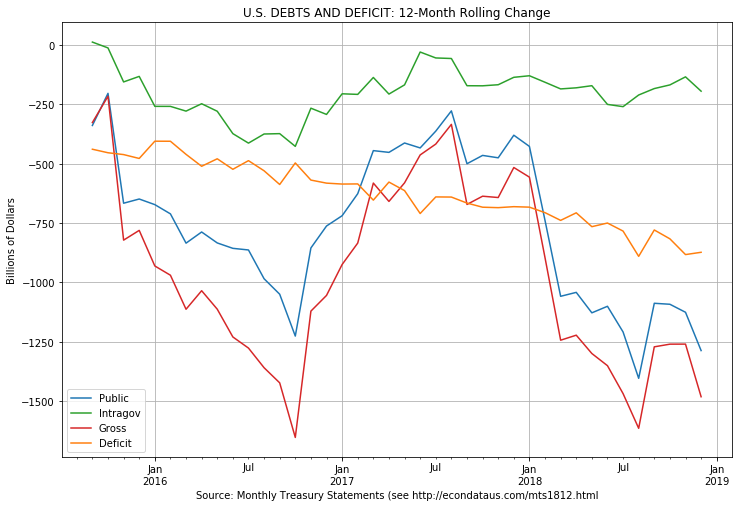

In [83]:
zzdiff = zz.diff()
zzdiff = -zzdiff.iloc[1:,]
zzdiff['Deficit'] = defs.iloc[0:,2]
zzrs = zzdiff.rolling(window=12).sum()
zzrs = zzrs.iloc[11:,]
#print(zz)
#print(zzdiff)

print('U.S. DEBTS AND DEFICIT: 12-Month Rolling Change ($billions)')
print(zzrs)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
colors = ['C0','C2','C3','C1']
#ax.plot(zzrs)
#zzrs[['Public','Intragov','Gross','Deficit']].plot(ax = ax, color=colors)
zzrs[:].plot(ax = ax, color=colors)
ax.set_title('U.S. DEBTS AND DEFICIT: 12-Month Rolling Change')
ax.set_xlabel(xlabel_last)
ax.set_ylabel('Billions of Dollars')
ax.grid(zorder=0)
ax.legend(zzrs.columns)
savefig_debts12m = "mts" + yrmo_last + "debts12m.png"
fig.savefig(savefig_debts12m)


As can be seen in the table and graph above, the 12-month changes in the public and gross debts were generally larger (negatively) than the 12-month rolling sum of the deficit.  However, the change in the debts reached a minimum in October of 2015 and August of 2017.  Non-coincidently, these were the final months of the debt crises after which the debts caught up and continued their prior trends.  Since it's been well over a year since the 2017 debt ceiling crisis ended, the latest 12-month rolling changes should not be much affected by it.  It's not surprising that the change in the gross federal debt is larger since it includes intergovernmental debt.  However, it does seem strange that the change in the Debt Held by the Public is so much larger, at over \$1.287 trillion.  This would seem to merit further investigation.

In any event, one likely factor in the increasing debts and deficits is the Tax Cuts and Jobs Act of 2017.  The [aforementioned CNSNews.com article] (https://www.cnsnews.com/news/article/terence-p-jeffrey/1665484000000-feds-collect-record-individual-income-taxes-calendar) concluded:

> Even as inflation-adjusted individual income taxes increased from calendar year 2017 to calendar year 2018, total federal tax collections declined.

> In calendar 2017, total federal tax collections in constant December 2018 dollars were \$3,407,503,740,000. In calendar year 2018, they were \$3,330,470,000,000—a decline of \$77,033,740,000 from 2017.

> Corporation income tax collections declined significantly from calendar year 2017 to calendar year 2018. In calendar 2017, the Treasury collected \$290,978,980,000 in corporation income taxes (in constant December 2018 dollars). In calendar 2018, the Treasury collected \$195,790,000,000 in corporation income taxes—a drop of \$95,188,980,000.

> That was a decline in corporation income tax revenue of 32.7 percent.

Note: The Jupyter Notebook from which this post is generated can be found at http://econdataus.com/mts1812.ipynb. It is identical to the one at http://econdataus.com/mts1804.ipynb except that it has been updated to include December 2018.  Links to additional Jupyter Notebooks can be found at http://econdataus.com/jupyter.html.
